<a href="https://colab.research.google.com/github/Abkhenaten/Market-Basket-Analysis/blob/master/Market_Basket_Analysis_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Data preparation

The first step in any Market Basket Analysis (MBA) project is to determine what constitutes an item, an itemset, and a transaction. This will depend on the dataset we're using and the question we're attempting to answer.

    Grocery store
        Item: Grocery
        Itemset: Collection of groceries
        Transaction: Basket of items purchased
    Music streaming service
        Item: Song
        Itemset: Collection of unique songs
        Transaction: User song library
    Ebook store
        Item: Ebook
        Itemset: One or more ebooks
        Transaction: User ebook library



What is an item?

    A product purchased from Olist.

What is an itemset?

    A collection of one or more product(s).

What is a transaction?

    An itemset that corresponds to a customer's order.



In [ ]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder

# Set default asthetic parameters.
sns.set()

# Define path to data.
data_path = 'https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/raw/master/data/'



In [ ]:
# Load orders dataset.
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [ ]:
#Print orders header
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


In [ ]:
#Print orders info
orders.info()

#print description
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


In [ ]:
#Print orders header
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [ ]:
#Print orders info
products.info()

#print description
products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [ ]:
#Print orders header
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
#Print orders info
translations.info()

#print description
translations.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,bebidas,books_technical
freq,1,1



Translating item category names

The product names are given in Portuguese. We'll translate the names to English using a pandas DataFrame named translations.

In [ ]:
#Translate product name to English
products = products.merge(translations, on='product_category_name', how='left')

products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object


Convert product IDs to product category names.

    Map product IDs to product category names, which are available in products.
    Use another .merge() with orders and subset of products columns.


In [ ]:
#Define product catefoty name in orders DataFrame
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english_x,product_category_name_english_y,product_category_name_english_x,product_category_name_english_y,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure,sports_leisure,sports_leisure,sports_leisure,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN,NaN,NaN,NaN,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure,sports_leisure,sports_leisure,sports_leisure,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,cool_stuff,cool_stuff,cool_stuff,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop,pet_shop,pet_shop,pet_shop,pet_shop


In [ ]:
#Drop products without a defined category
orders.dropna(inplace=True, subset=['product_category_name_english'])

In [ ]:
#Print number of unique items
len(orders['product_id'].unique())

32328

In [ ]:
#Print number of unique categories
len(orders['product_category_name_english'].unique())

71


Construct transactions from order and product data

    We will perform Market Basket Analysis on transactions. A transaction consists of the unique items purchased by a customer.
    Need to extract transactions from orders DataFrame. Group all items in an order.



In [ ]:
#ID transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [ ]:
#ID transactions associated with example order
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object



Map orders to transactions.

    .groupby() splits a DataFrame into groups according to some criterion.
    .unique() returns list of unique values.



In [ ]:
#Recover transaction itemsets from orders Dataframe
transactions = orders.groupby('order_id').product_category_name_english.unique()
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75            [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

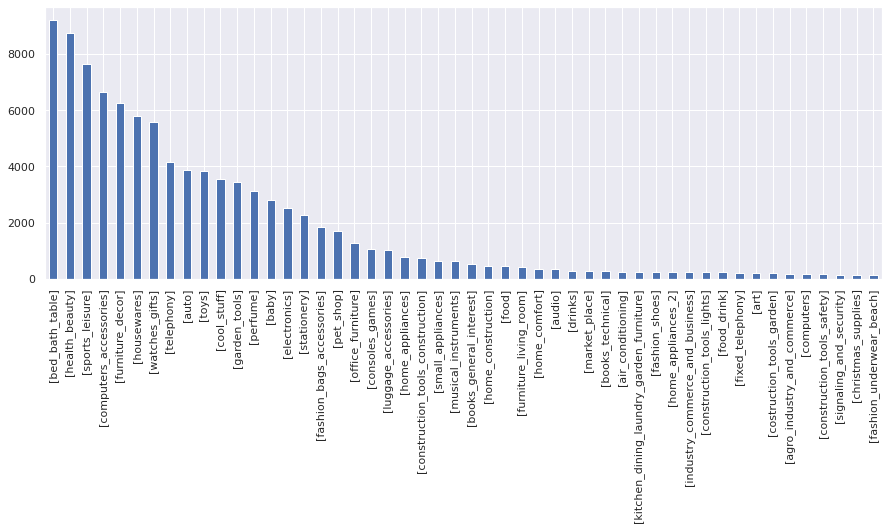

In [ ]:
#Plot 50 largest categories of transactions
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [ ]:
#Convert pandas series to list of lists
transactions = transactions.tolist()

Summarize final transaction data

In [ ]:
#Lenght of transactions
len(transactions)

97256

In [ ]:
#Number of unique categories for each transaction
counts = [len(transaction) for transaction in transactions]

In [ ]:
#Median number of items in a transaction
np.median(counts)

1.0

In [ ]:
#Maximum number of items in a transaction
np.max(counts)

3


Association Rules and Metrics

Association rule: an "if-then" relationship between two itemsets.

    rule: if {coffee) then {milk}.
    antecedent: coffee
    consequent: milk

Metric: a measure of the strength of association between two itemsets.

    rule: if {coffee) then {milk}
    support: 0.10
    leverage: 0.03

One-hot encode the transaction data

    One-hot encoding data.
        TransactionEncoder() instantiates an encoder object.
        .fit() creates mapping between list and one-hot encoding.
        .transform() transforms list into one-hot encoded array.

    Applying one-hot encoding will transform the list of lists (of transactions) into a DataFrame.
        
    One-hot encoding simplifies the computation of metrics.
 

